In [13]:
import os
import pywt
import librosa
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
import tensorflow as tf
import tensorflow_io as tfio
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import *
from sklearn.utils import shuffle
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [14]:
data_test = pd.read_csv("bee_dataset.csv")

data_test.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,91,92,93,94,95,96,97,98,99,Label
0,0,0.276949,0.277871,0.277635,0.277899,0.278524,0.278079,0.277153,0.278850,0.278084,...,-0.628702,-0.611281,-0.598672,-0.577381,-0.573174,-0.564264,-0.550211,-0.545061,-0.539697,1
1,1,-1.211096,-1.210662,-1.210799,-1.210669,-1.210384,-1.210804,-1.212018,-1.211351,-1.213882,...,-0.873361,-0.941303,-1.004014,-1.074170,-1.104963,-1.131867,-1.197298,-1.228209,-1.263463,0
2,2,-0.430973,-0.431227,-0.431162,-0.431246,-0.431442,-0.431392,-0.431326,-0.431945,-0.432273,...,1.396948,1.412602,1.426856,1.432660,1.445189,1.448968,1.450864,1.451005,1.449528,1
3,3,-0.589942,-0.589948,-0.589944,-0.589959,-0.589991,-0.590071,-0.590296,-0.590395,-0.590978,...,1.012360,0.980707,0.948314,0.905566,0.882127,0.842269,0.802692,0.765566,0.728233,0
4,4,-0.031310,-0.031731,-0.031604,-0.031737,-0.032034,-0.031784,-0.031192,-0.031980,-0.031170,...,0.871171,0.889101,0.906761,0.921226,0.936462,0.948664,0.962518,0.973536,0.983934,1


In [15]:
X = data_test.drop("Label", axis = 1).values
y = data_test["Label"].values
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

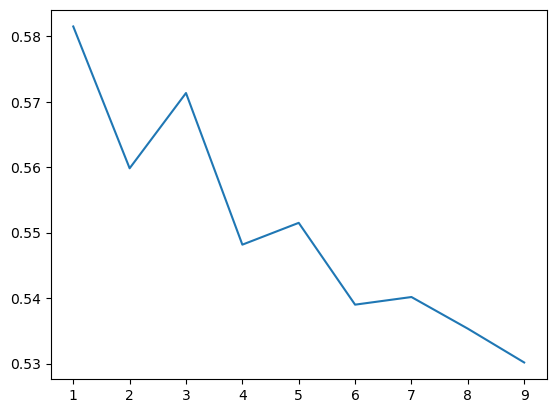

In [16]:
# KNeighborsClassifier

scores = {}
confusion_matrixs = {}

for i in range(1,10):
    model_knn = KNeighborsClassifier(n_neighbors = i)
    model_knn.fit(X_train, y_train)
    y_pred = model_knn.predict(X_test)
    scores[i] = accuracy_score(y_test, y_pred)

plt.plot(list(scores.keys()), list(scores.values()))



In [17]:
Models = [LogisticRegression(max_iter = 1000), RandomForestClassifier(n_estimators = 100), KNeighborsClassifier(n_neighbors = 3), DecisionTreeClassifier()]

Model_names = ["Logistic Regression", "Random Forest", "KNN", "Decision Tree"]

In [18]:
accuracies = []
classifier_reports = []
confusion_matrixs = []

for model in range(len(Models)):
    clf = Models[model]
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))
    classifier_reports.append(classification_report(y_test, y_pred))
    confusion_matrixs.append(confusion_matrix(y_test, y_pred))

In [19]:
for accuracy, matrix, classifier_report, model_name in zip(accuracies, confusion_matrixs, classifier_reports, Model_names):
    print("Model: ", model_name)
    print("Accuracy: ", accuracy)
    print("Confusion Matrix: \n", matrix)
    print("Classification Report: \n", classifier_report)
    print("---------------------------------------------------------")

Model:  Logistic Regression
Accuracy:  0.6765
Confusion Matrix: 
 [[1532 1522]
 [ 419 2527]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.79      0.50      0.61      3054
           1       0.62      0.86      0.72      2946

    accuracy                           0.68      6000
   macro avg       0.70      0.68      0.67      6000
weighted avg       0.71      0.68      0.67      6000

---------------------------------------------------------
Model:  Random Forest
Accuracy:  0.8323333333333334
Confusion Matrix: 
 [[2515  539]
 [ 467 2479]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.84      0.82      0.83      3054
           1       0.82      0.84      0.83      2946

    accuracy                           0.83      6000
   macro avg       0.83      0.83      0.83      6000
weighted avg       0.83      0.83      0.83      6000

----------------------------------------------

In [64]:
svm = SVC(kernel= "rbf", gamma = 0.1)
svm.fit(X_train, y_train)

SVC(gamma=0.1)

In [65]:
y_pred = svm.predict(X_test)
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Classification Report: \n",classification_report(y_test, y_pred))

Accuracy:  0.5515
Classification Report: 
               precision    recall  f1-score   support

           0       0.55      0.64      0.59      3054
           1       0.55      0.46      0.50      2946

    accuracy                           0.55      6000
   macro avg       0.55      0.55      0.55      6000
weighted avg       0.55      0.55      0.55      6000



In [66]:
from sklearn.metrics import confusion_matrix

In [67]:
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))

Confusion Matrix: 
 [[1959 1095]
 [1596 1350]]
